In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn missingno

Note: you may need to restart the kernel to use updated packages.


Exploratory Data Analysis(EDA)

In [3]:
# importing necessary Llibraries: 
import pandas as pd # importing the dataframe and it is used for data cleaning and analysis. 
import seaborn as sns # used for plotting statistical graphics
import matplotlib.pyplot as plt # used to create 2D graphs and plots 
import warnings # warnings module suppresses repeated warnings from the same source to cut down on the annoyance of seeing the same message over and over.
warnings.filterwarnings("ignore") # ignore warnings

In [4]:
# reading the dataset

df = pd.read_csv(r"D:\Guvi_Project\Household_energy_usage_forecast\individual+household+electric+power+consumption\household_power_consumption.txt", sep=';')

In [5]:
# dataset overview
# univariate analysis

df.info() # gives the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
# gives the first 5 rows of the dataset
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Changing the datatype of the columns for further analysis

In [7]:
# Ensure 'Datetime' is in datetime format
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
# set the index to be the Datetime column
df.set_index('Datetime', inplace=True)

# Drop original Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Parse date and time into separate features.
# Extract time-based features
Hour = df.index.hour
Day = df.index.day
Month = df.index.month
Weekday = df.index.weekday

# changing the datatype of the 'Global_active_power' column to float
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# changing the datatype of the 'Global_reactive_power' column to float
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')

# changing the datatype of the 'Voltage' column to float
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# changing the datatype of the 'Global_intensity' column to float
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')

# changing the datatype of the 'Sub_metering_1' column to float
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')

# changing the datatype of the 'Sub_metering_2' column to float
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [8]:
# gives the information about the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [9]:
# statistical information about the dataset

df.describe() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [10]:
df.shape # gives the shape of the dataset

(2075259, 7)

In [11]:
df.head() # gives the first 5 rows of the dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
df.columns # gives the columns of the dataset

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

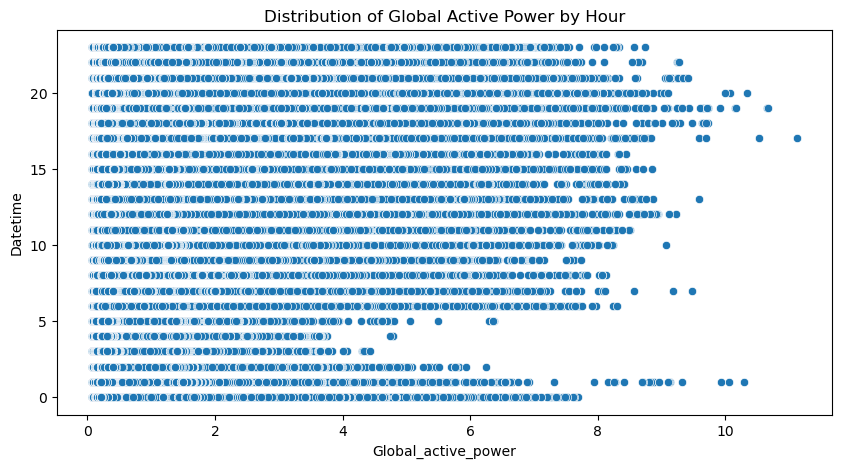

In [13]:
# Bi-variate analysis

# visualizing the distribution of the peak power consumption by hourly basis
# here we can see that the peak power consumption is between 6pm to 9pm
# and the lowest power consumption is between 6am to 9am
plt.figure(figsize=(10, 5))
sns.scatterplot(data = df, x = "Global_active_power", y =Hour)
plt.title('Distribution of Global Active Power by Hour')
plt.show()

Inferences:
Here using the scatter plot we can see the distribution of the peak power consumption by hourly basis.
1. The peak power consumption is between 6pm to 9pm.
2. The lowest power consumption is between 1am to 5am.

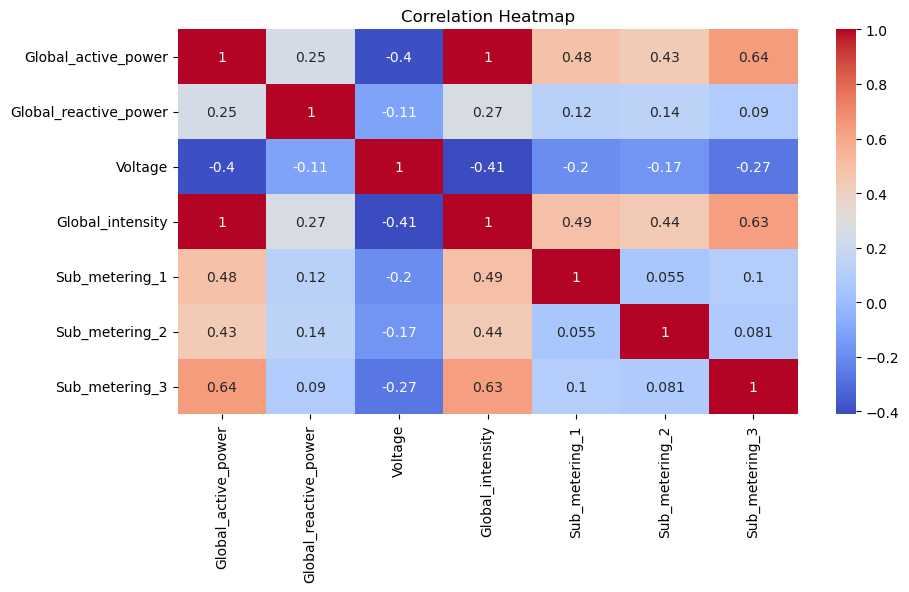

In [14]:
# multivariate analysis

# visualizing the correlation between the features
# here we can see that the 'Global_intensity' and 'Global_active_power' are highly correlated
# and the 'Voltage' and 'Global_active_power' are negatively correlated
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Inferences: Here using correlation of the features 
1. we can see that the 'Global_intensity' and 'Global_active_power' are highly correlated 
2. The 'Voltage' and 'Global_active_power' are negatively correlated.
3. Apart from we can also see that the all features are positively correlated with each other.


Data Preprocessing

<Axes: >

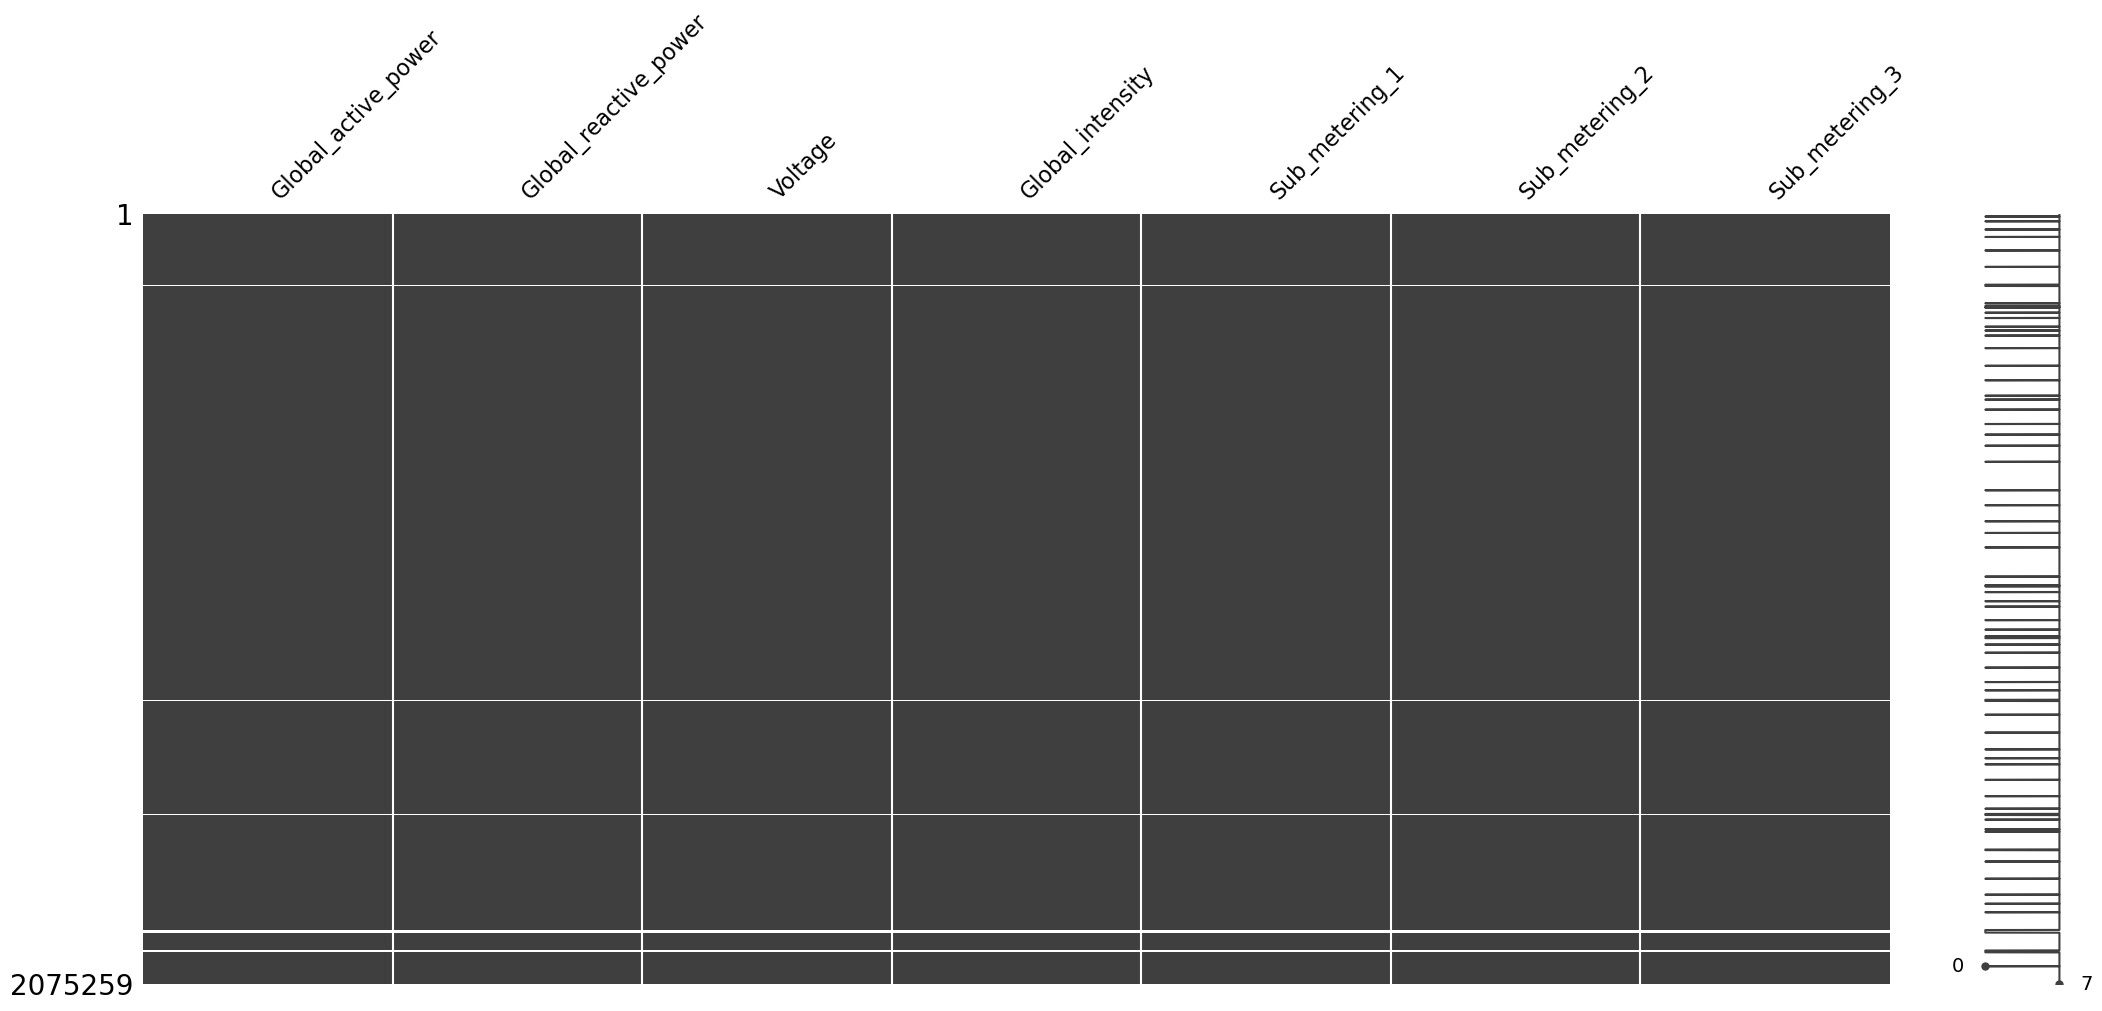

In [15]:
# checking for missing values in the dataset
import missingno as msno # used to visualize missing data in the dataset
msno.matrix(df) # gives the visualization of missing values in the dataset

Inferences:
1. Using this matrix diagram we can see that there are missing values in the dataset which needs to be handled. 
2. In this project, we will be using the mean of the respective columns to fill the missing values.

In [16]:
# here we can see that there are missing values in the dataset other than the 'Date' and 'Time' columns
# I am going to fill the missing values with the mean of the respective columns and check the model performance. if it is not good then I need to use the alternative method to fill the missing values.
# Alternate method for missing numerical data : Ask client -> BA -> SME -> Mean -> Median -> Mode -> STD -> ffill -> bfill -> interolate -> KNN -> dropna.

# filling the missing values with the mean of the respective columns
df['Global_active_power'].fillna(df['Global_active_power'].mean(), inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(), inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(), inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(), inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(), inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(), inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)
df.isnull().sum() # gives the sum of null values in each column

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Feature Scaling : Data Reduction

In [17]:
# Normalizing the dataset
# Normalization is used to scale the data of the dataset so that all the data points lie between 0 and 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()
# now we are going to use the scaled data for the model building

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.973749,2.627217,-1.863517,3.118369,-0.183489,-0.051598,1.257315
1,4.062593,2.787911,-2.239335,4.159920,-0.183489,-0.051598,1.138043
2,4.075918,3.341412,-2.344937,4.159920,-0.183489,0.121249,1.257315
3,4.089243,3.377122,-2.205170,4.159920,-0.183489,-0.051598,1.257315
4,2.450266,3.609235,-1.602618,2.529666,-0.183489,-0.051598,1.257315


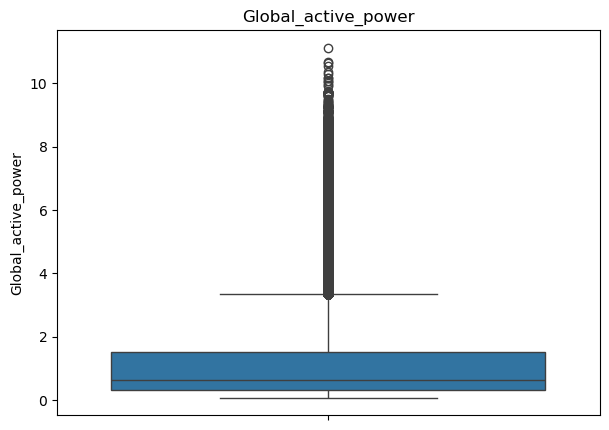

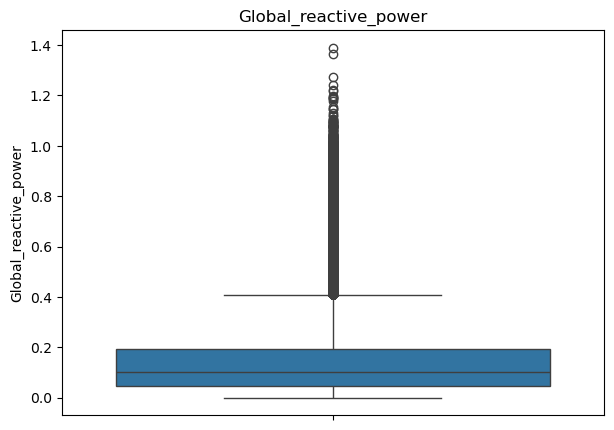

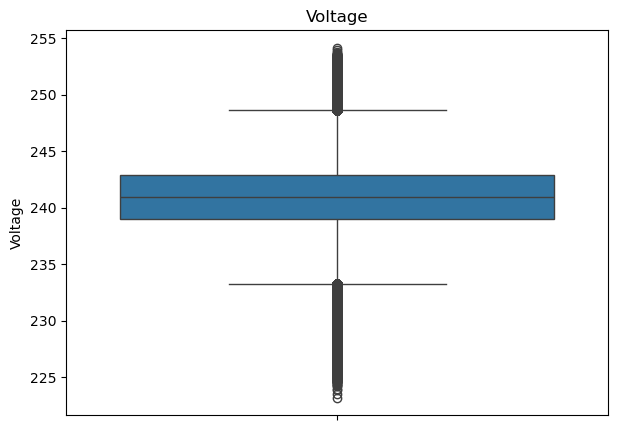

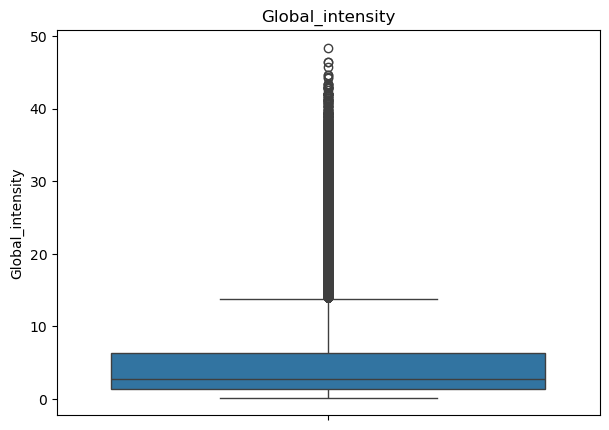

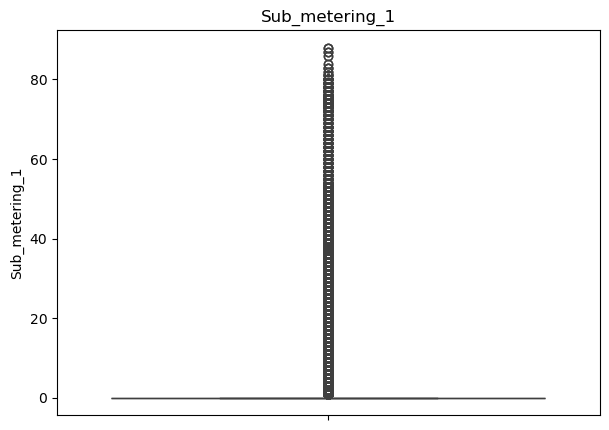

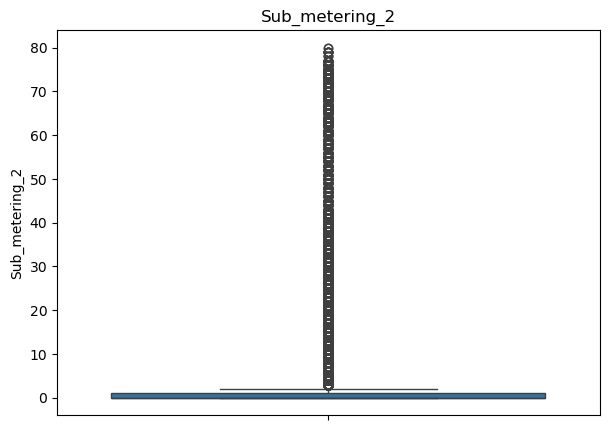

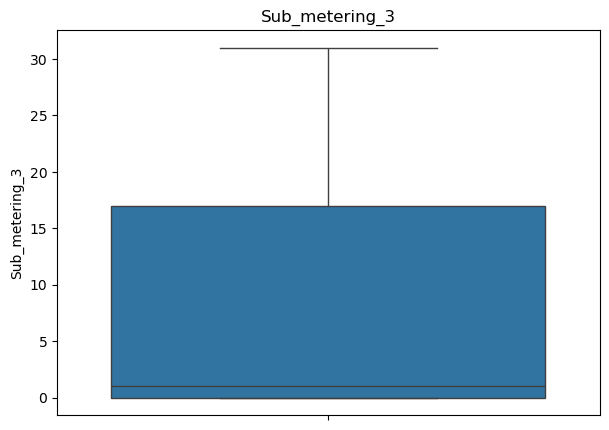

In [18]:
# checking for the outliers in the dataset
# boxplot is used to visualize the outliers in the dataset
# After visualizing the outliers we can decide whether to remove the outliers or not.
for col in scaled_df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()
    

Inferences:
1. The dataset contains the outliers in the 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2' columns.
2. In this project we are going to use winsorize method to remove the outliers from the dataset.

In [19]:
from scipy.stats.mstats import winsorize
# winsorizing the outliers in the dataset
scaled_df['Global_active_power'] = winsorize(scaled_df['Global_active_power'], limits=[0.05, 0.05])
scaled_df['Global_reactive_power'] = winsorize(scaled_df['Global_reactive_power'], limits=[0.05, 0.05])
scaled_df['Voltage'] = winsorize(scaled_df['Voltage'], limits=[0.05, 0.05])
scaled_df['Global_intensity'] = winsorize(scaled_df['Global_intensity'], limits=[0.05, 0.05])
scaled_df['Sub_metering_1'] = winsorize(scaled_df['Sub_metering_1'], limits=[0.1, 0.1])
scaled_df['Sub_metering_2'] = winsorize(scaled_df['Sub_metering_2'], limits=[0.05, 0.05])


In [20]:
# using z-score to detect the outliers in the dataset
# z-score is used to detect the outliers in the dataset
# if the z-score is greater than 3 then it is an outlier

for col in scaled_df.columns:
    print(col)
    col_mean = scaled_df[col].mean()
    col_std = scaled_df[col].std()
    threshold = 3
    outliers = []
    for i in scaled_df[col]:
        z = (i - col_mean) / col_std
        if abs(z) > threshold:
            outliers.append(i)
    print(outliers)

Global_active_power
[]
Global_reactive_power
[]
Voltage
[]
Global_intensity
[]
Sub_metering_1
[]
Sub_metering_2
[]
Sub_metering_3
[]


Model Selection and Training:

In [21]:
# Split dataset into train/test sets
from sklearn.model_selection import train_test_split
X = scaled_df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = scaled_df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression Model

In [22]:
# Algorithm Selection
# Linear Regression is used to predict the continuous dependent variable using a given set of independent variables.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
Linear_model = LinearRegression()

In [23]:
# Model Training / fitting the model
Linear_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Model Prediction
y_pred_linear = Linear_model.predict(X_test)

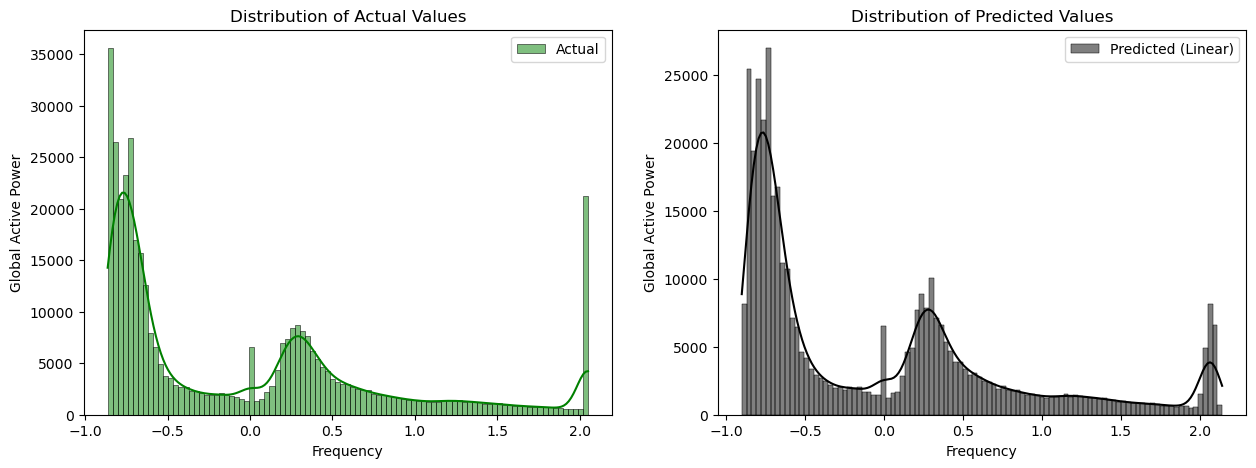

In [44]:
# ploting for the actual and predicted values
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(y_test, color='g', label='Actual', ax=ax[0], kde=True)
ax[0].set_title('Distribution of Actual Values')
ax[0].set_ylabel('Global Active Power')
ax[0].set_xlabel('Frequency')
ax[0].legend()

sns.histplot(y_pred_linear, color='k', label='Predicted (Linear)', ax=ax[1], kde=True)
ax[1].set_title('Distribution of Predicted Values')
ax[1].set_ylabel('Global Active Power')
ax[1].set_xlabel('Frequency')
ax[1].legend()

plt.show()

In [45]:
# Model Evaluation
linear_mae = mean_absolute_error(y_test, y_pred_linear)
print('Mean Absolute Error:', linear_mae)
linear_mse = mean_squared_error(y_test, y_pred_linear)
print('Mean Squared Error:', linear_mse)
linear_rmse = root_mean_squared_error(y_test, y_pred_linear)
print('Root Mean Squared Error:', linear_rmse)
linear_r2 = r2_score(y_test, y_pred_linear)
print('R2 Score:', linear_r2)

Mean Absolute Error: 0.02333890499327812
Mean Squared Error: 0.0013336911262276155
Root Mean Squared Error: 0.03651973611935901
R2 Score: 0.9981642946652216



Lasso Regresssion model

In [46]:
# importing the Lasso model
# Lasso is used to select the important features of the dataset
from sklearn.linear_model import Lasso
Lasso_model = Lasso()

In [47]:
# Model Training / fitting the model
Lasso_model.fit(X_train, y_train)

Lasso()

In [52]:
# Model Prediction
y_pred_lasso = Lasso_model.predict(X_test)

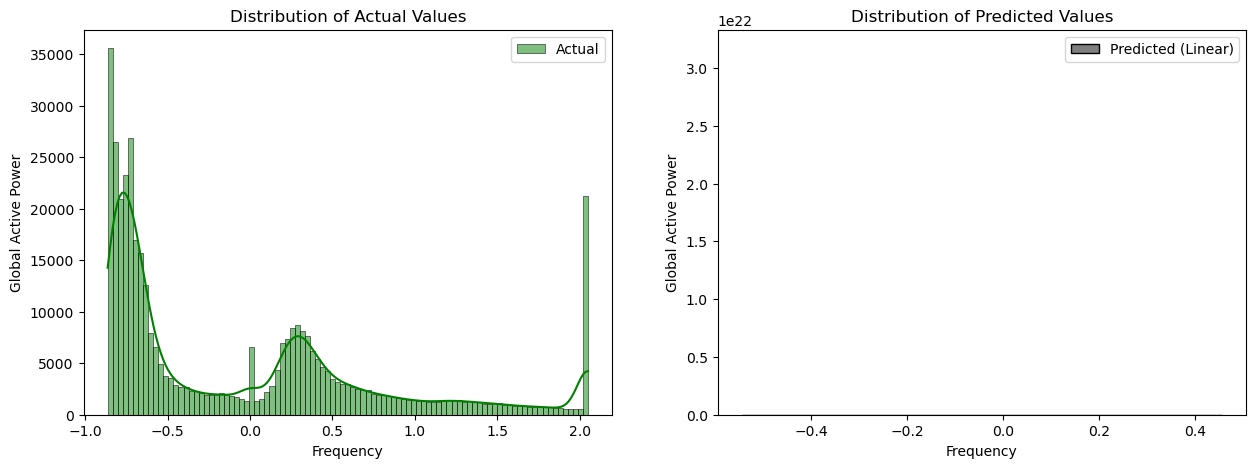

In [53]:
# ploting for the actual and predicted values
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(y_test, color='g', label='Actual', ax=ax[0], kde=True)
ax[0].set_title('Distribution of Actual Values')
ax[0].set_ylabel('Global Active Power')
ax[0].set_xlabel('Frequency')
ax[0].legend()

sns.histplot(y_pred_lasso, color='k', label='Predicted (Linear)', ax=ax[1], kde=True)
ax[1].set_title('Distribution of Predicted Values')
ax[1].set_ylabel('Global Active Power')
ax[1].set_xlabel('Frequency')
ax[1].legend()

plt.show()

In [54]:
# Model Evaluation
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
print('Mean Absolute Error:', lasso_mae)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print('Mean Squared Error:', lasso_mse)
lasso_rmse = root_mean_squared_error(y_test, y_pred_lasso)
print('Root Mean Squared Error:', lasso_rmse)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print('R2 Score:', lasso_r2)


Mean Absolute Error: 0.7159045571182443
Mean Squared Error: 0.7265286242939974
Root Mean Squared Error: 0.8523664847317716
R2 Score: -1.0086728636782283e-06


Ridge Regression Model

In [55]:
# importing the Ridge model
# Ridge is used to select the important features of the dataset
from sklearn.linear_model import Ridge
ridge_model = Ridge()

In [56]:
# Model Training / fitting the model
ridge_model.fit(X_train, y_train)

Ridge()

In [57]:
# Model Prediction
y_pred_ridge = ridge_model.predict(X_test)

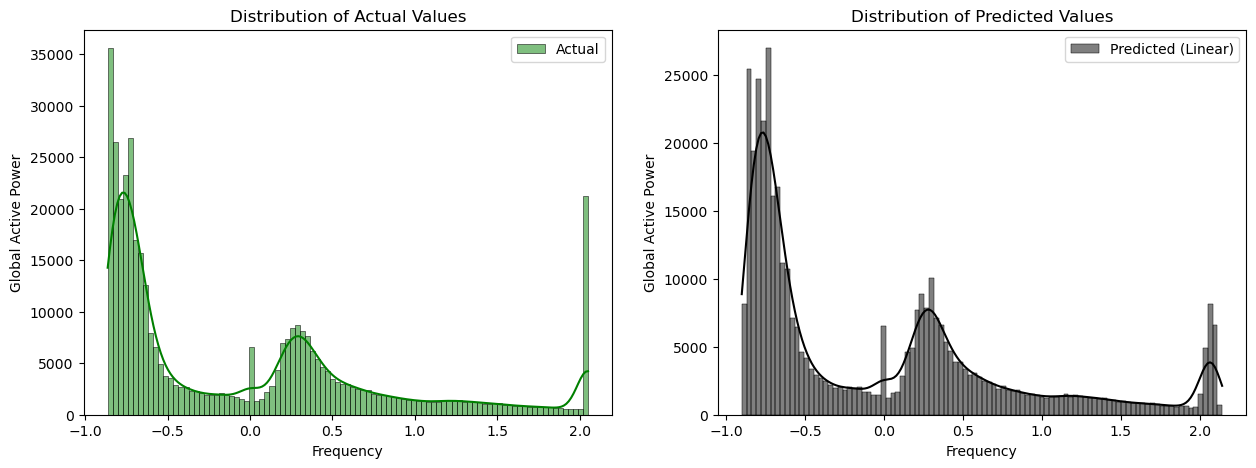

In [58]:
# ploting for the actual and predicted values
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(y_test, color='g', label='Actual', ax=ax[0], kde=True)
ax[0].set_title('Distribution of Actual Values')
ax[0].set_ylabel('Global Active Power')
ax[0].set_xlabel('Frequency')
ax[0].legend()

sns.histplot(y_pred_ridge, color='k', label='Predicted (Linear)', ax=ax[1], kde=True)
ax[1].set_title('Distribution of Predicted Values')
ax[1].set_ylabel('Global Active Power')
ax[1].set_xlabel('Frequency')
ax[1].legend()

plt.show()

In [59]:
# Model Evaluation
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
print('Mean Absolute Error:', ridge_mae)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print('Mean Squared Error:',ridge_mse)
ridge_rmse = root_mean_squared_error(y_test, y_pred_ridge)
print('Root Mean Squared Error:', ridge_rmse)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print('R2 Score:', ridge_r2)

Mean Absolute Error: 0.023338918068869917
Mean Squared Error: 0.0013336910210076562
Root Mean Squared Error: 0.03651973467876863
R2 Score: 0.9981642948100474


Elastinet regression Model

In [60]:
# importing the Elastinet model
# Elastinet is used to select the important features of the dataset
from sklearn.linear_model import ElasticNet 
enet_model = ElasticNet()

In [61]:
# Model Training / fitting the model
enet_model.fit(X_train, y_train)

ElasticNet()

In [62]:
# Model Prediction
y_pred_enet = enet_model.predict(X_test)

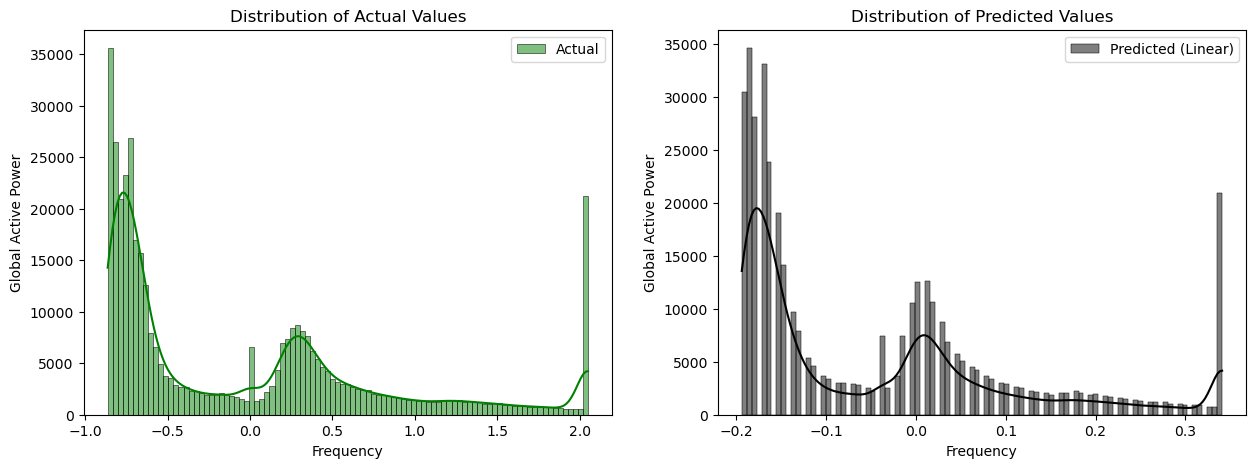

In [63]:
# ploting for the actual and predicted values
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(y_test, color='g', label='Actual', ax=ax[0], kde=True)
ax[0].set_title('Distribution of Actual Values')
ax[0].set_ylabel('Global Active Power')
ax[0].set_xlabel('Frequency')
ax[0].legend()

sns.histplot(y_pred_enet, color='k', label='Predicted (Linear)', ax=ax[1], kde=True)
ax[1].set_title('Distribution of Predicted Values')
ax[1].set_ylabel('Global Active Power')
ax[1].set_xlabel('Frequency')
ax[1].legend()

plt.show()

In [64]:
# Model Evaluation
enet_mae = mean_absolute_error(y_test, y_pred_enet)
print('Mean Absolute Error:', enet_mae)
enet_mse = mean_squared_error(y_test, y_pred_enet)
print('Mean Squared Error:',enet_mse)
enet_rmse = root_mean_squared_error(y_test, y_pred_enet)
print('Root Mean Squared Error:', enet_rmse)
enet_r2 = r2_score(y_test, y_pred_enet)
print('R2 Score:', enet_r2)

Mean Absolute Error: 0.5878220474293807
Mean Squared Error: 0.4876457476625979
Root Mean Squared Error: 0.6983163664576378
R2 Score: 0.3287996876771375


Random Forest Regressor

In [65]:
# importing the RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [66]:
# Model Training / fitting the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
# Model Prediction
y_pred_rf = rf_model.predict(X_test)

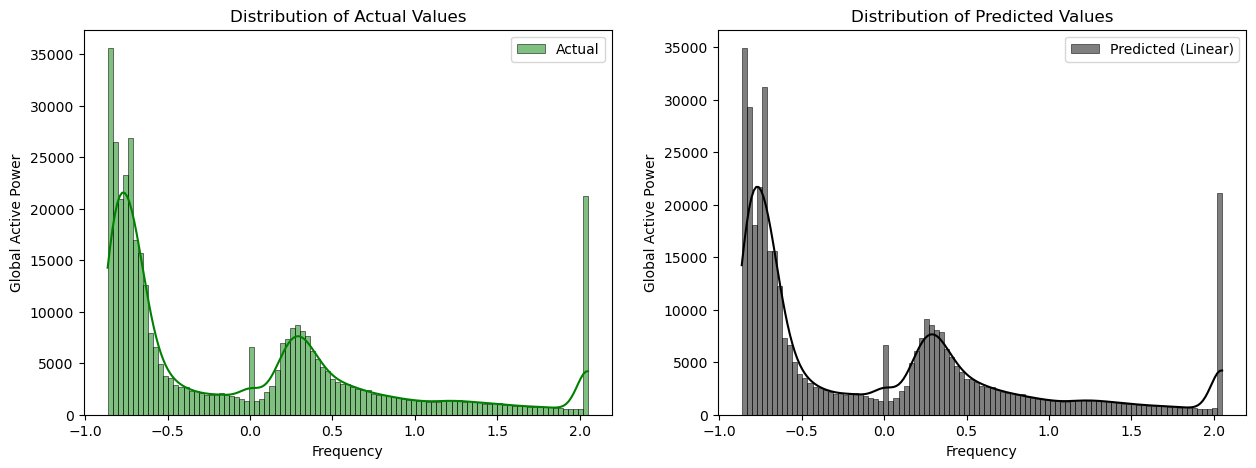

In [68]:
# ploting for the actual and predicted values
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(y_test, color='g', label='Actual', ax=ax[0], kde=True)
ax[0].set_title('Distribution of Actual Values')
ax[0].set_ylabel('Global Active Power')
ax[0].set_xlabel('Frequency')
ax[0].legend()

sns.histplot(y_pred_rf, color='k', label='Predicted (Linear)', ax=ax[1], kde=True)
ax[1].set_title('Distribution of Predicted Values')
ax[1].set_ylabel('Global Active Power')
ax[1].set_xlabel('Frequency')
ax[1].legend()

plt.show()

In [69]:
# Model Evaluation
rf_mae = mean_absolute_error(y_test, y_pred_rf)
print('Mean Absolute Error:', rf_mae)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error:',rf_mse)
rf_rmse = root_mean_squared_error(y_test, y_pred_rf)
print('Root Mean Squared Error:', rf_rmse)
rf_r2 = r2_score(y_test, y_pred_rf)
print('R2 Score:', rf_r2)

Mean Absolute Error: 0.017900467706654356
Mean Squared Error: 0.0011456420319367819
Root Mean Squared Error: 0.03384733419247049
R2 Score: 0.9984231272530686


Gradient Boosting Regressor

In [70]:
# importing the gradient boosting regressor model
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

In [71]:
# Model Training / fitting the model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [72]:
# Model Prediction
y_pred_gb = gb_model.predict(X_test)

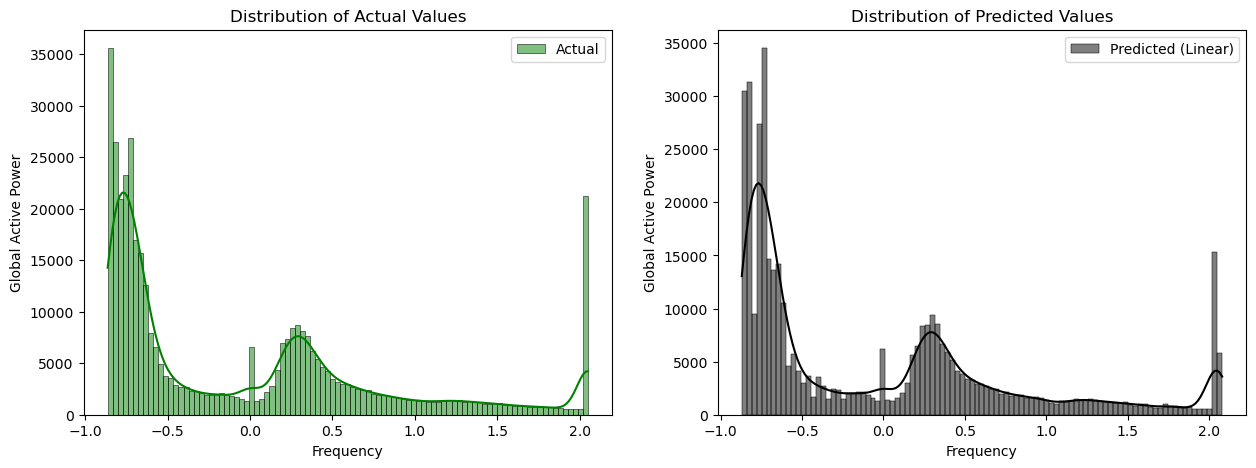

In [73]:
# ploting for the actual and predicted values
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(y_test, color='g', label='Actual', ax=ax[0], kde=True)
ax[0].set_title('Distribution of Actual Values')
ax[0].set_ylabel('Global Active Power')
ax[0].set_xlabel('Frequency')
ax[0].legend()

sns.histplot(y_pred_gb, color='k', label='Predicted (Linear)', ax=ax[1], kde=True)
ax[1].set_title('Distribution of Predicted Values')
ax[1].set_ylabel('Global Active Power')
ax[1].set_xlabel('Frequency')
ax[1].legend()

plt.show()

In [74]:
# Model Evaluation
gb_mae = mean_absolute_error(y_test, y_pred_gb)
print('Mean Absolute Error:', gb_mae)
gb_mse = mean_squared_error(y_test, y_pred_gb)
print('Mean Squared Error:',gb_mse)
gb_rmse = root_mean_squared_error(y_test, y_pred_gb)
print('Root Mean Squared Error:', gb_rmse)
gb_r2 = r2_score(y_test, y_pred_gb)
print('R2 Score:', rf_r2)

Mean Absolute Error: 0.01889161100065327
Mean Squared Error: 0.0010923808947302161
Root Mean Squared Error: 0.03305118598069086
R2 Score: 0.9984231272530686


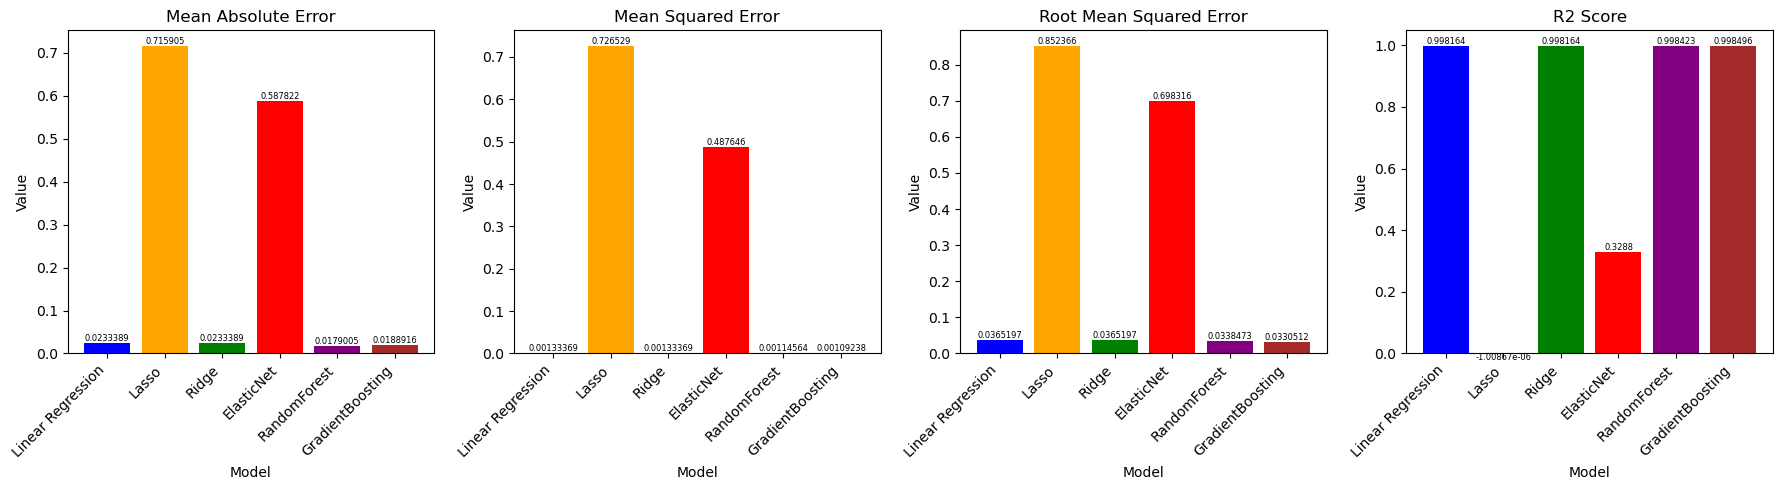

In [75]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))  # Create 1 row, 4 columns of subplots

metrics = {
    'Mean Absolute Error': [linear_mae, lasso_mae, ridge_mae, enet_mae, rf_mae, gb_mae],
    'Mean Squared Error': [linear_mse, lasso_mse, ridge_mse, enet_mse, rf_mse, gb_mse],
    'Root Mean Squared Error': [linear_rmse, lasso_rmse, ridge_rmse, enet_rmse, rf_rmse, gb_rmse],
    'R2 Score': [linear_r2, lasso_r2, ridge_r2, enet_r2, rf_r2, gb_r2]
    
}

models = ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet', 'RandomForest', 'GradientBoosting']

for ax, (title, values) in zip(axes, metrics.items()):
    ax.bar(models, values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
    ax.set_title(title)
    ax.bar_label(ax.containers[0], fontsize = 6)  # Add labels to bars
    ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate labels for better visibility
    ax.set_ylabel('Value')
    ax.set_xlabel('Model')
        
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Inferences:
1. The Gradient Boosting Regressor model has the lowest Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error compared to other models.
2. The Gradient Boosting Regressor model has the highest R2 Score compared to other models.
3. The Gradient Boosting Regressor model is the best model for this dataset.
4. The Lasso Regression model has the highest Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error compared to other models.
5. The Lasso Regression model has the lowest R2 Score compared to other models.
6. The Lasso Regression model is the worst model for this dataset.
7. The Linear Regression model, Ridge Regression model, and ElasticNet model have similar performance.
8. The Random Forest Regressor model has the similar performance as the Gradient Boosting Regressor model.
9. The Random Forest Regressor model is the second-best model for this dataset.
10. The Random Forest Regressor model has the second-highest R2 Score compared to other models.
11. The Random Forest Regressor model has the second-lowest Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error compared to other models.